# Функции

In [1]:
Generate_B <- function(r, N, B0 = 1) {
  B <- numeric(N)  
  B[1] <- B0
  
  for (n in 2:N) {
    B[n] <- (1 + r) * B[n - 1]
  }
  
  return(B)
}

Generate_S <- function(S0, N, a, b, p) {
  S <- numeric(N) 
  S[1] <- S0  
  
  for (n in 2:N) {      
    if (rbinom(1, 1, p) == 1) {
      rho_n <- b
    } else {
      rho_n <- a
    }
    S[n] <- (1 + rho_n) * S[n - 1]
  }
  
  return(S)
}

binom <- function(j, N, p) {
    b <- 0
    for (k in j:N) {
        b <- b + factorial(N) / (factorial(k) * factorial(N - k)) * p ^ k * (1 - p) ^ (N - k)
    }
    return(b)
}

calculate_price <- function(S0, N, a, b, r, K) {
    K0 <- 1 + log(K / (S0 * ((1 + a) ^ N))) * (log((1 + b) / (1 + a))) ^ (-1)
    p_tr <- (r - a) / (b - a)
    p_st <- ((1 + b) / (1 + r)) * p_tr
        
    option_price <- S0 * binom(K0, N, p_st) - K * ((1 + r) ^ (-N)) * binom(K0, N, p_tr)
    return(option_price)
}

# $\{ B_n \}$ + plot

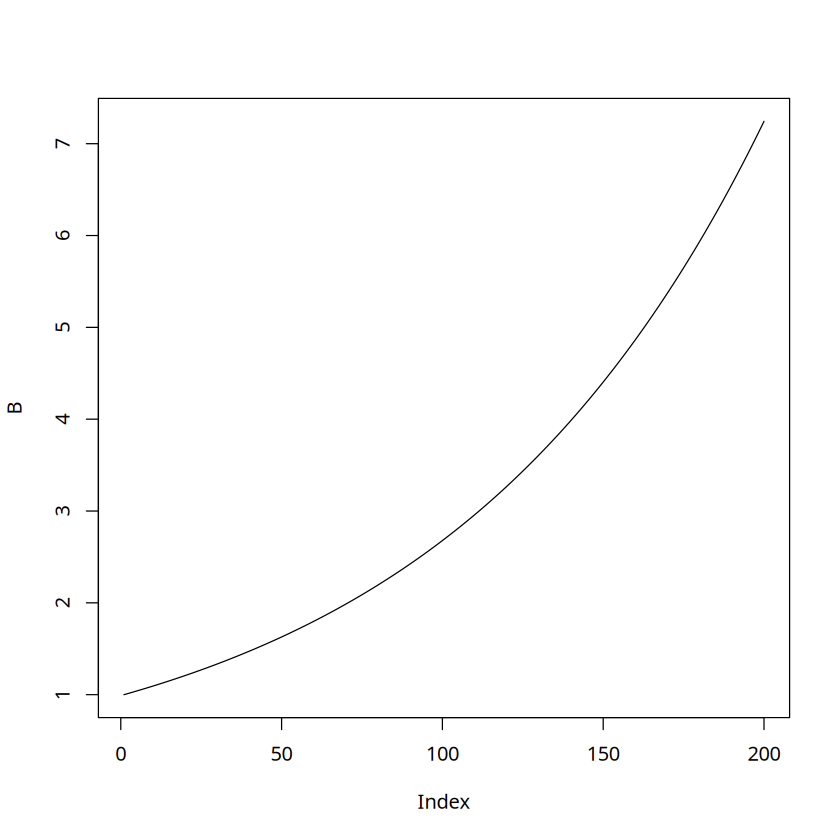

In [2]:
B <- Generate_B(r = .01, N = 200)
plot(B, type = "l")

# $\{ S_n \}$ + plot


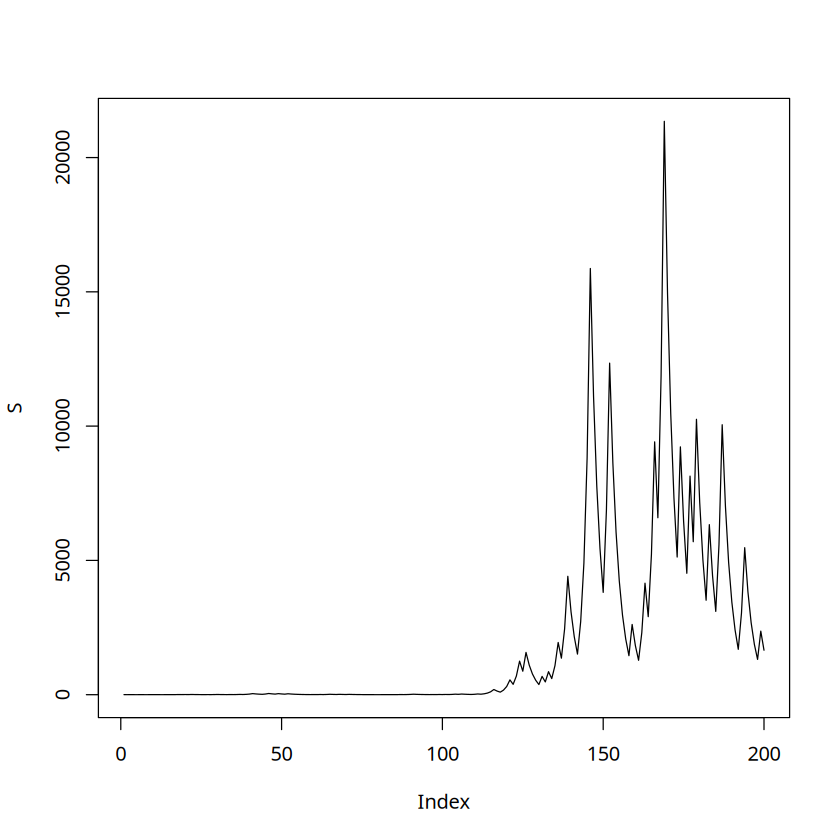

In [3]:
S <- Generate_S(S0 = 1, N = 200, a = -.3, b = .8, p = .4 )
plot(S, type="l")

# Справедливая цена

In [4]:
calculate_price(S0 = 100, N = 10, a = -0.3, b = 0.8, r = 0.2, K = 100)

[1] 86.10654